In [2]:
import pandas
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Importing & Vizualising data

In [3]:
import graphlab
graphlab.SFrame('home_data.gl/').to_dataframe().to_csv("home_data.csv", index=False)

ds = pandas.read_csv("home_data.csv")
ds.head()

[INFO] 1448806407 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /home/mgaudin/Documents/Sandbox/Coursera/ML/venv/local/lib/python2.7/site-packages/certifi/cacert.pem
1448806407 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This trial license of GraphLab Create is assigned to gaudin.maxime@gmail.com and will expire on December 27, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-6044 - Server binary: /home/mgaudin/Documents/Sandbox/Coursera/ML/venv/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1448806407.log
[INFO] GraphLab Server Version: 1.7.1


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13 00:00:00+00:00,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.511234,-122.256775,1340,5650
1,6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.721023,-122.318862,1690,7639
2,5631500400,2015-02-25 00:00:00+00:00,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.737927,-122.233196,2720,8062
3,2487200875,2014-12-09 00:00:00+00:00,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.520820,-122.393185,1360,5000
4,1954400510,2015-02-18 00:00:00+00:00,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.616812,-122.044901,1800,7503


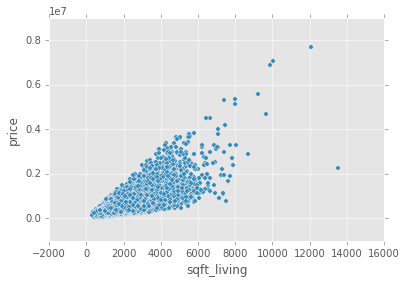

In [4]:
ds.plot(x="sqft_living", y="price", kind="scatter").figure.savefig("priceBySize.pdf")

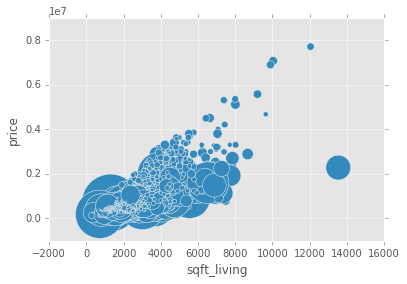

In [5]:
ds.plot(x="sqft_living", y="price", s=ds['sqft_lot'] / 500, kind="scatter")

/home/mgaudin/Documents/Sandbox/Coursera/ML/venv/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/mgaudin/Documents/Sandbox/Coursera/ML/venv/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


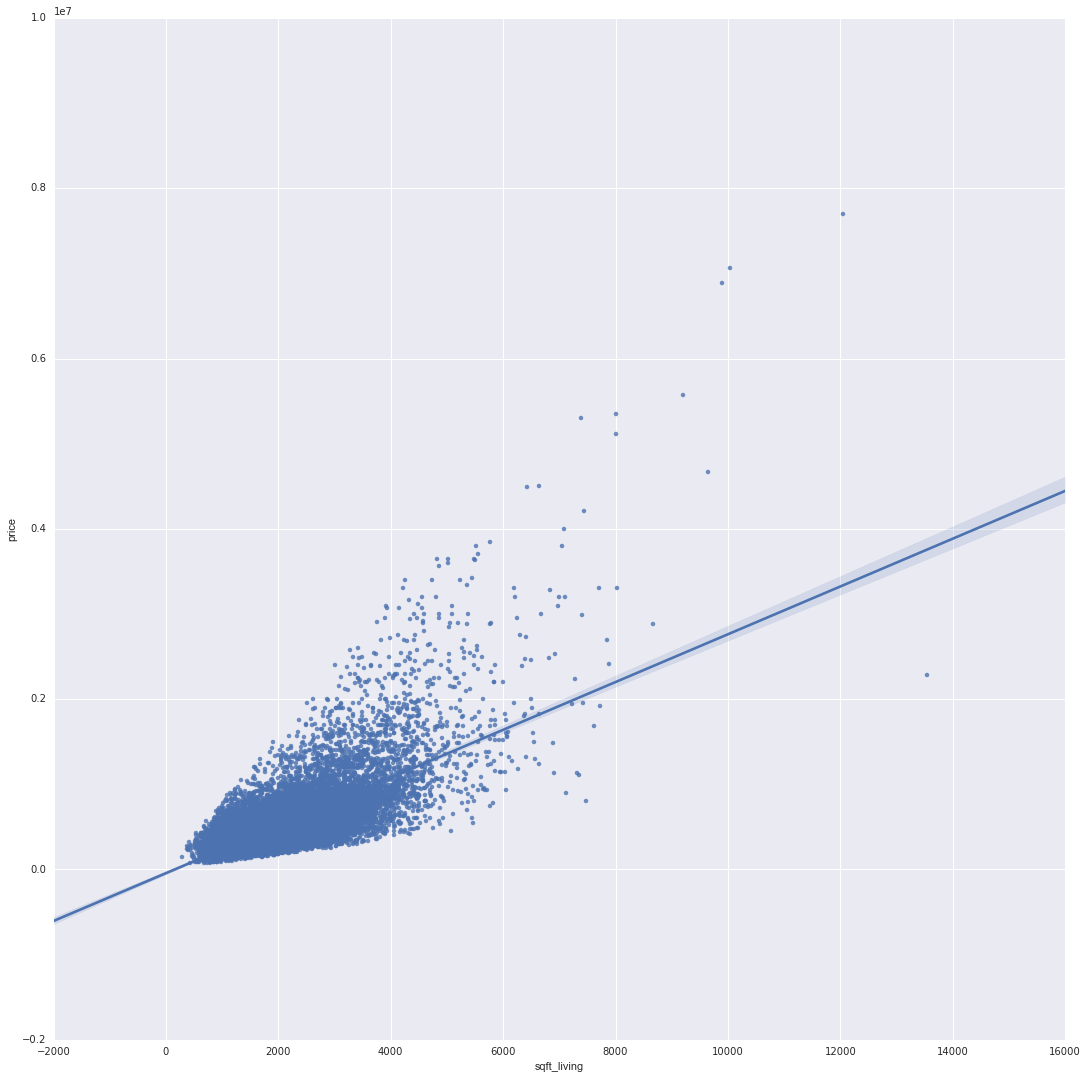

In [6]:
import seaborn
%matplotlib inline
seaborn.pairplot(ds,x_vars='sqft_living', y_vars='price',size=15, kind='reg')

# Creating a regression model of sqftLivig to Price

In [108]:
from sklearn.cross_validation import train_test_split
trainingDS,testDS = train_test_split( ds[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'price']], train_size=0.80, random_state=0)

In [117]:
features = ['sqft_living']
responses = ['price']

trainingFeatures = trainingDS[features]
trainingResponses = trainingDS[responses]

testFeatures = testDS[features]
testResponses = testDS[responses]

In [118]:
from sklearn import linear_model
model =  linear_model.LinearRegression()
model.fit(trainingFeatures, trainingResponses)
(model.coef_, model.intercept_)

(array([[ 283.96855737]]), array([-48257.06345556]))

In [119]:
def p(x):
    return (model.coef_[0] * x + model.intercept_)[0]

# Evaluate the model

In [120]:
testDS['predictedPrice'] = testDS['sqft_living'].map(p)
testDS['error'] = abs(testDS['price'] - testDS['predictedPrice'])
testDS['errorPercentage'] = testDS['error'] * 100 / testDS['price']
testDS

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,price,predictedPrice,error,errorPercentage
17384,2,1.50,1430,1650,3.0,98125,297000,357817.973581,60817.973581,20.477432
722,4,3.25,4670,51836,2.0,98005,1578000,1277876.099453,300123.900547,19.019259
2680,2,0.75,1440,3700,1.0,98107,562100,360657.659154,201442.340846,35.837456
18754,2,1.00,1130,2640,1.0,98109,631500,272627.406370,358872.593630,56.828598
14554,4,2.50,3180,9603,2.0,98155,780000,854762.948974,74762.948974,9.584993
16227,3,2.50,1650,3436,2.0,98053,485000,420291.056202,64708.943798,13.342050
6631,3,2.75,1720,28000,1.0,98058,340000,440168.855217,100168.855217,29.461428
19813,3,2.50,2538,4600,2.0,98092,335606,672455.135144,336849.135144,100.370415
3367,4,2.50,2460,5440,2.0,98058,425000,650305.587670,225305.587670,53.013079
21372,5,3.50,4460,2975,3.0,98119,490000,1218242.702405,728242.702405,148.620960


In [121]:
import numpy
numpy.mean((model.predict(testFeatures)-testResponses)**2)

price    6.194079e+10
dtype: float64

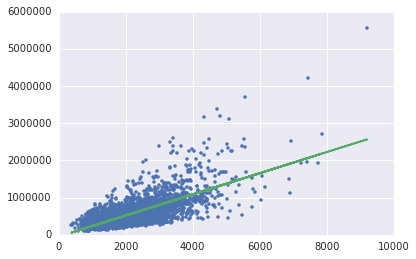

In [122]:
from pylab import *

plt.plot(testFeatures, testResponses, '.', testFeatures,  model.predict(testFeatures), '-')
pylab.savefig("RegressionGraph.pdf")

# Explore other features

In [123]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
responses = ['price']

trainingFeatures = trainingDS[features]
trainingResponses = trainingDS[responses]

testFeatures = testDS[features]
testResponses = testDS[responses]

In [124]:
trainingFeatures

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
5268,3,1.00,1570,5510,1.0,98115
16909,3,2.50,1780,11000,1.0,98006
16123,3,1.50,1090,9862,1.0,98074
12181,4,2.50,2210,7079,2.0,98031
12617,3,2.50,1800,4763,2.0,98119
19024,4,2.00,3100,8000,1.5,98103
5063,4,3.75,5070,60123,2.0,98053
9888,1,1.00,1180,4000,1.5,98118
2774,3,2.50,1800,5372,2.0,98034
3197,4,1.75,3010,12523,1.0,98125


In [ ]:
len(set(ds['zipcode']))

In [ ]:
seaborn.set(style="ticks", palette="muted", color_codes=True)
bp = seaborn.boxplot(data=ds, x='zipcode',y='price')
bp.set_yscale("log")
bp